# Morphometric Data Analysis and Visualization in the Malagasy Nesomyrmex sikorai Species Group

## Protocol of Character Recording

**CL**: Maximum cephalic length in the median line. The head must be carefully tilted to the position providing the true maximum. Excavations of hind vertex and/or clypeus reduce CL, [R = 0.998]  
(Fig 1A).

**CW**: Maximum width of the head including compound eyes, [R = 0.999].

**CWb**: Maximum width of head capsule without the compound eyes. Measured just posterior to the eyes, [R = 0.998].

**PoOC**: Postocular distance. Use a cross-scaled ocular micrometer and adjust the head to the measuring position of CL. Caudal measuring point: median occipital margin; anterior measuring point: median head at the level of the posterior eye margin, [R = 0.997].

**SL**: Scape length. Maximum straight line scape length excluding the basal neck and the articular condyle, [R = 0.998].

**CS**: Absolute cephalic size. The arithmetic mean of CL and CWb.

**EL**: Maximum diameter of the compound eye, [R = 0.929].

**FRS**: Frontal carina distance. Distance of the frontal carinae immediately caudal of the posterior intersection points between frontal carinae and torular lamellae. If these dorsal lamellae do not laterally surpass the frontal carinae, the deepest point of scape corner pits may be taken as the reference line. These pits take up the inner corner of the scape base when the scape is directed fully caudally and produces a dark, triangular shadow in the lateral frontal lobes immediately posterior to the dorsal lamellae of the scape joint capsule, [R = 0.982].

**MW**: Mesosoma width. In workers MW is defined as the longest width of the pronotum in dorsal view excluding the pronotal spines, [R = 0.998].

**PSTI**: Apical distance of pronotal spines in dorsal view; if spine tips are rounded or thick take the centers of spine tips as reference points, [R = 0.994].

**PEW**: Maximum width of petiole in dorsal view. Nodal spines are not considered, [R = 0.996].

**PPW**: Postpetiole width. Maximum width of postpetiole in dorsal view, [R = 0.994].

**SPBA**: Minimum propodeal spine distance. The smallest distance of the lateral margins of the propodeal spines at their base. This should be measured in antero-dorsal view, since the wider parts of the ventral propodeum do not interfere with the measurement in this position. If the lateral margins of propodeal spines diverge continuously from the tip to the base, a smallest distance at base is not defined. In this case, SPBA is measured at the level of the bottom of the interspinal meniscus, [R = 0.993].

**SPTI**: Apical propodeal spine distance. The distance of propodeal spine tips in dorsal view; if spine tips are rounded or truncated, the centers of spine tips are taken as reference points, [R = 0.994].

**ML (Weber’s length)**: Mesosoma length from caudalmost point of propodeal lobe to transition point between anterior pronotal slope and anterior pronotal shield (preferentially measured in lateral view; if the transition point is not well defined, use dorsal view and take the center of the dark-shaded borderline between pronotal slope and pronotal shield as anterior reference point), [R = 0.998].

**MPST**: Maximum distance from the center of the propodeal spiracle to the posteroventral corner of the ventrolateral margin of the metapleuron, [R = 0.989].

**NOH**: Maximum height of the petiolar node, measured in lateral view from the uppermost point of the petiolar node perpendicular to a reference line set from the petiolar spiracle to the imaginary midpoint of the transition between the dorso-caudal slope and dorsal profile of caudal cylinder of the petiole, [R = 0.958].

**NOL**: Length of the petiolar node. Measured in lateral view from the center of the petiolar spiracle to the dorso-caudal corner of caudal cylinder. Do not erroneously take as the reference point the dorso-caudal corner of the helcium, which is sometimes visible, [R = 0.981].

**PPL**: Postpetiole length. The longest anatomical line that is perpendicular to the posterior margin of the postpetiole and is between the posterior postpetiolar margin and the anterior postpetiolar margin, [R = 0.975].

**SPST**: Propodeal spine length. Distance between the center of the propodeal spiracle and spine tip. The spiracle center refers to the midpoint defined by the outer cuticular ring but not to the center of the actual spiracle opening, which may be positioned eccentrically, [R = 0.994] .

**PEH**: Maximum petiole height. The longest distance measured from the ventral petiolar profile at node level (perpendicular to the chord length of the petiolar sternum) to the distalmost point of the dorsal profile of the petiolar node, [R = 0.989].

**PEL**: Diagonal petiolar length in lateral view; measured from anterior corner of subpetiolar process to dorso-caudal corner of caudal cylinder, [R = 0.991].

**PPH**: Maximum height of the postpetiole in lateral view measured perpendicularly to a line defined by the linear section of the segment border between postpetiolar tergite and sternite, [R = 0.991].


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from google.colab import drive
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.set_option("display.max_row", None)
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
data_path = r"/content/drive/My Drive/Colab Docs/ant.csv"
df = pd.read_csv(data_path, encoding='ISO-8859-1')
dfc = df.copy()

In [9]:
df = pd.DataFrame(df)

In [10]:
cols = df.columns.tolist()
cols

['casent',
 'new codes for PTs',
 'species',
 'CL',
 'PoOC',
 'CW',
 'CWb',
 'FRS',
 'SL',
 'EL',
 'MW',
 'PSTI',
 'PEW',
 'PPW',
 'SPBA',
 'SPTI',
 'ML',
 'PEL',
 'NOL',
 'MPST',
 'PEH',
 'NOH',
 'PPH',
 'SPST',
 'PPL',
 'dendroname',
 'lat',
 'long',
 'Unnamed: 28',
 'CS (µm)',
 'PoOC/CL',
 'CL/CW',
 'CL/CWb',
 'FRS/CS',
 'SL/CS',
 'EL/CS',
 'MW/CS',
 'PSTI/CS',
 'PEW/CS',
 'PPW/CS',
 'SPBA/CS',
 'SPTI/CS',
 'ML/CS',
 'PEL/CS',
 'NOL/CS',
 'MPST/CS',
 'PEH/CS',
 'NOH/CS',
 'PPH/CS',
 'SPST/CS',
 'PPL/CS']

In [11]:
df = df[["species",
 "casent",
 "dendroname",
 "new codes for PTs",
 "CL",
 "PoOC",
 "CW",
 "CWb",
 "FRS",
 "SL",
 "EL",
 "MW",
 "PSTI",
 "PEW",
 "PPW",
 "SPBA",
 "SPTI",
 "ML",
 "PEL",
 "NOL",
 "MPST",
 "PEH",
 "NOH",
 "PPH",
 "SPST",
 "PPL",
 "lat",
 "long",
 "Unnamed: 28",
 "CS (µm)",
 "PoOC/CL",
 "CL/CW",
 "CL/CWb",
 "FRS/CS",
 "SL/CS",
 "EL/CS",
 "MW/CS",
 "PSTI/CS",
 "PEW/CS",
 "PPW/CS",
 "SPBA/CS",
 "SPTI/CS",
 "ML/CS",
 "PEL/CS",
 "NOL/CS",
 "MPST/CS",
 "PEH/CS",
 "NOH/CS",
 "PPH/CS",
 "SPST/CS",
 "PPL/CS"]]


In [12]:
df.head()

,species,casent,dendroname,new codes for PTs,CL,PoOC,CW,CWb,FRS,SL,EL,MW,PSTI,PEW,PPW,SPBA,SPTI,ML,PEL,NOL,MPST,PEH,NOH,PPH,SPST,PPL,lat,long,Unnamed: 28,CS (µm),PoOC/CL,CL/CW,CL/CWb,FRS/CS,SL/CS,EL/CS,MW/CS,PSTI/CS,PEW/CS,PPW/CS,SPBA/CS,SPTI/CS,ML/CS,PEL/CS,NOL/CS,MPST/CS,PEH/CS,NOH/CS,PPH/CS,SPST/CS,PPL/CS
0,excelsior,CASENT_0077416,excelsior-CASENT_0077416,NaN,830,380,702,650,208,582,178,450,458,188,268,170,180,1010,390,270,310,222,132,218,200,198,-13.26333,49.60333,NaN,740.0,0.457831,1.182336,1.276923,0.281081,0.786486,0.240541,0.608108,0.618919,0.254054,0.362162,0.229730,0.243243,1.364865,0.527027,0.364865,0.418919,0.300000,0.178378,0.294595,0.270270,0.267568
1,excelsior,CASENT_0077416,excelsior-CASENT_0077416,NaN,820,382,710,660,210,582,172,460,455,195,272,190,220,1015,405,275,315,232,138,218,212,200,-13.26333,49.60333,NaN,740.0,0.465854,1.154930,1.242424,0.283784,0.786486,0.232432,0.621622,0.614865,0.263514,0.367568,0.256757,0.297297,1.371622,0.547297,0.371622,0.425676,0.313514,0.186486,0.294595,0.286486,0.270270
2,excelsior,CASENT_0077417,excelsior-CASENT_0077417,NaN,830,388,700,652,210,588,170,465,460,190,270,180,230,1010,395,260,300,218,135,218,210,182,-13.26333,49.60333,NaN,741.0,0.467470,1.185714,1.273006,0.283401,0.793522,0.229420,0.627530,0.620783,0.256410,0.364372,0.242915,0.310391,1.363023,0.533063,0.350877,0.404858,0.294197,0.182186,0.294197,0.283401,0.245614
3,excelsior,CASENT_0077417,excelsior-CASENT_0077417,NaN,830,372,695,640,215,602,172,448,450,190,272,175,215,1000,392,270,320,210,125,208,222,185,-13.26333,49.60333,NaN,735.0,0.448193,1.194245,1.296875,0.292517,0.819048,0.234014,0.609524,0.612245,0.258503,0.370068,0.238095,0.292517,1.360544,0.533333,0.367347,0.435374,0.285714,0.170068,0.282993,0.302041,0.251701
4,excelsior,CASENT_0077418,excelsior-CASENT_0077418,NaN,762,340,640,585,198,552,155,420,405,165,240,150,185,930,360,240,285,200,120,188,190,175,-13.26333,49.60333,NaN,673.5,0.446194,1.190625,1.302564,0.293987,0.819599,0.230141,0.623608,0.601336,0.244989,0.356347,0.222717,0.274684,1.380846,0.534521,0.356347,0.423163,0.296956,0.178174,0.279139,0.282108,0.259837


In [13]:
# DataFrame'deki NaN değerlerinin sayısını kontrol etme
nan_count = df.isna().sum()
print(nan_count)

species                0
casent                 0
dendroname             0
new codes for PTs    221
CL                     0
PoOC                   0
CW                     0
CWb                    0
FRS                    0
SL                     0
EL                     0
MW                     0
PSTI                   0
PEW                    0
PPW                    0
SPBA                   0
SPTI                   0
ML                     0
PEL                    0
NOL                    0
MPST                   0
PEH                    0
NOH                    0
PPH                    0
SPST                   0
PPL                    0
lat                    0
long                   0
Unnamed: 28          227
CS (µm)                0
PoOC/CL                0
CL/CW                  0
CL/CWb                 0
FRS/CS                 0
SL/CS                  0
EL/CS                  0
MW/CS                  0
PSTI/CS                0
PEW/CS                 0
PPW/CS                 0


In [14]:
df = df.drop(columns=["Unnamed: 28", "new codes for PTs", "casent"], axis=1)

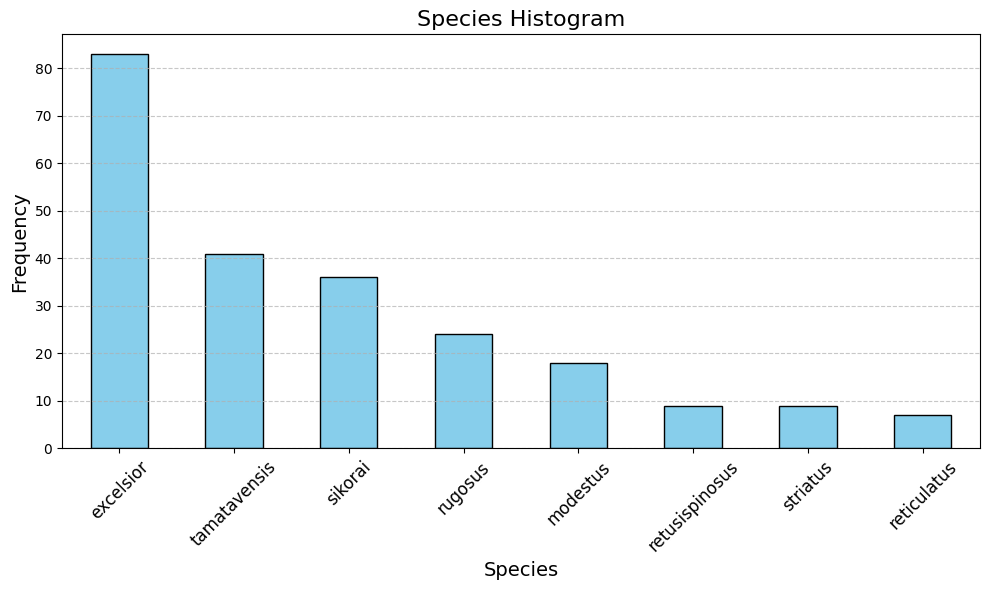

In [15]:
species_counts = df["species"].value_counts()

# Histogramı oluştur
plt.figure(figsize=(10, 6))
species_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Grafik ayarları
plt.title("Species Histogram", fontsize=16)
plt.xlabel("Species", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Grafik gösterimi
plt.tight_layout()
plt.show()

In [16]:
# Özellikler (X) ve etiketler (y) olarak ayırma
X = df.drop(columns=['dendroname',"species"])  # 'species' dışında kalan tüm sütunlar özellikler
y = df['dendroname']  # 'species' sütunu sınıf etiketleri

lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

# Tahminler
predlda = lda.predict(X)

# Doğruluk oranı
accuracy = (predlda == y).mean()
print(f"LDA doğruluk oranı: {accuracy * 100:.2f}%")

LDA doğruluk oranı: 100.00%


In [17]:
X_lda = lda.fit_transform(X, df['dendroname'])  # 'target_column' hedef değişkeniniz

In [18]:
linked = linkage(X_lda, method='ward')  # Ward metodu ile kümeleme

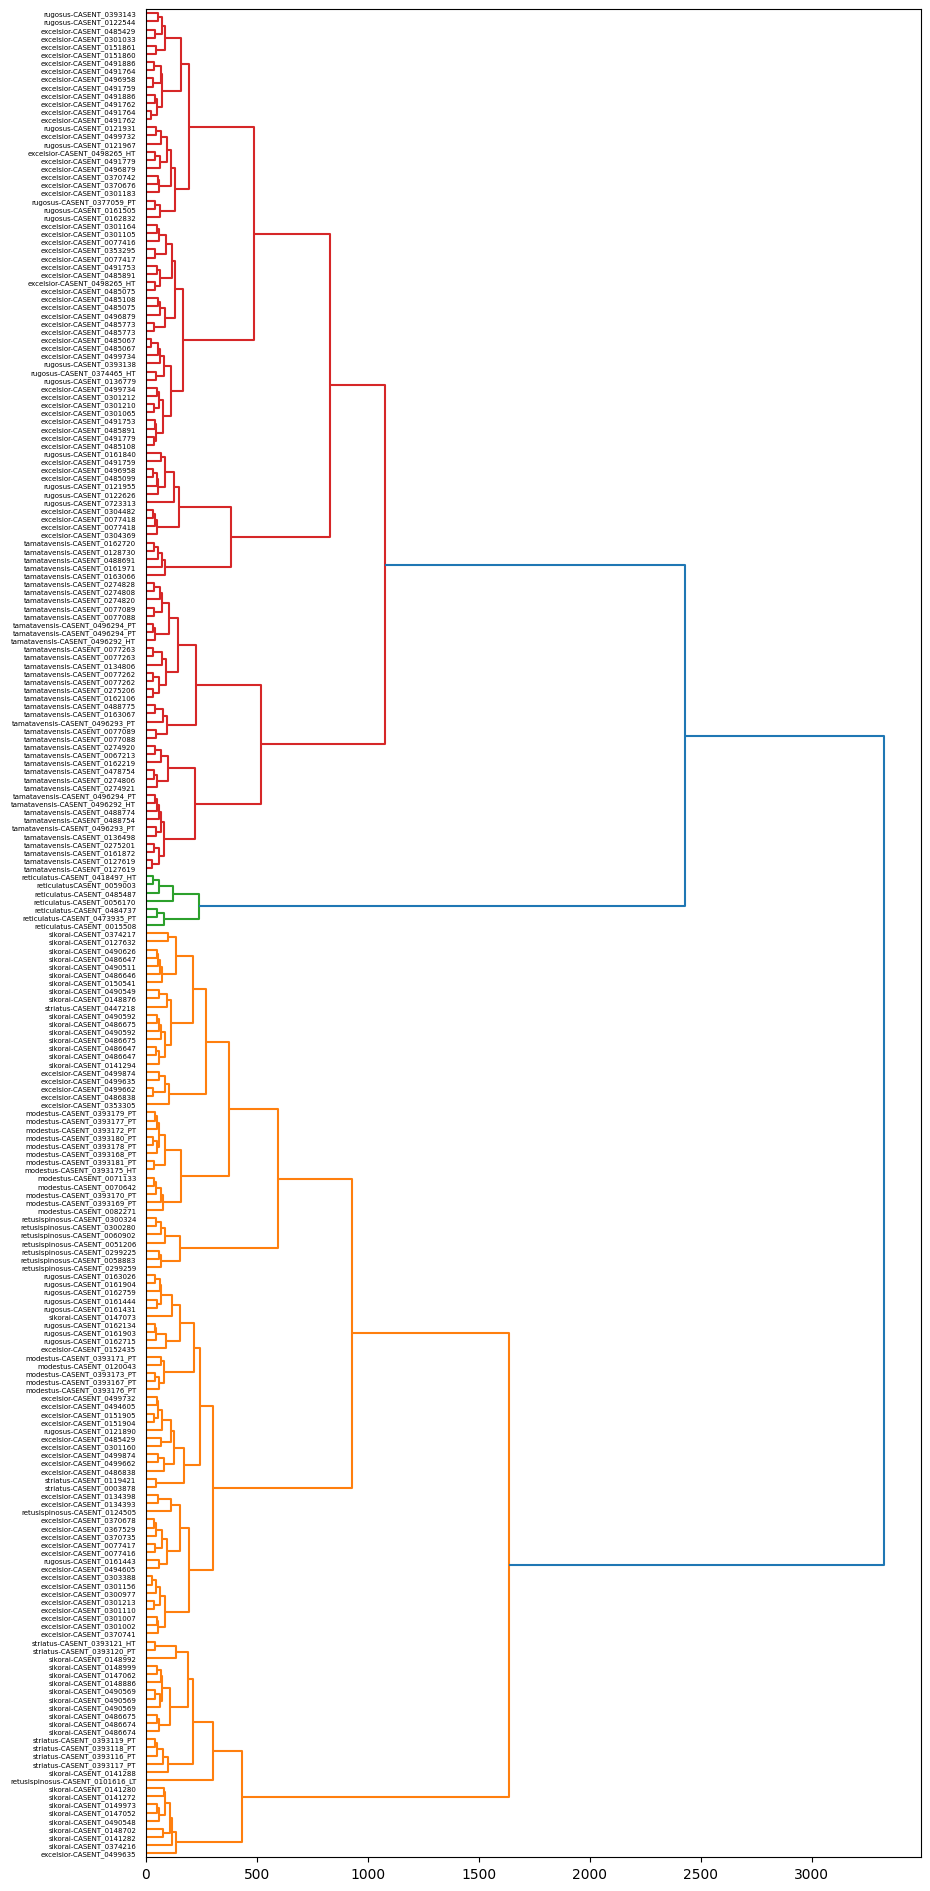

In [19]:
features = df.drop(columns=['species', "dendroname"])
Z = sch.linkage(features, method='ward')
# Dendrogram'ı oluşturuyoruz
plt.figure(figsize=(10, 24))
sch.dendrogram(Z, labels=df['dendroname'].values, orientation='right')
plt.show()

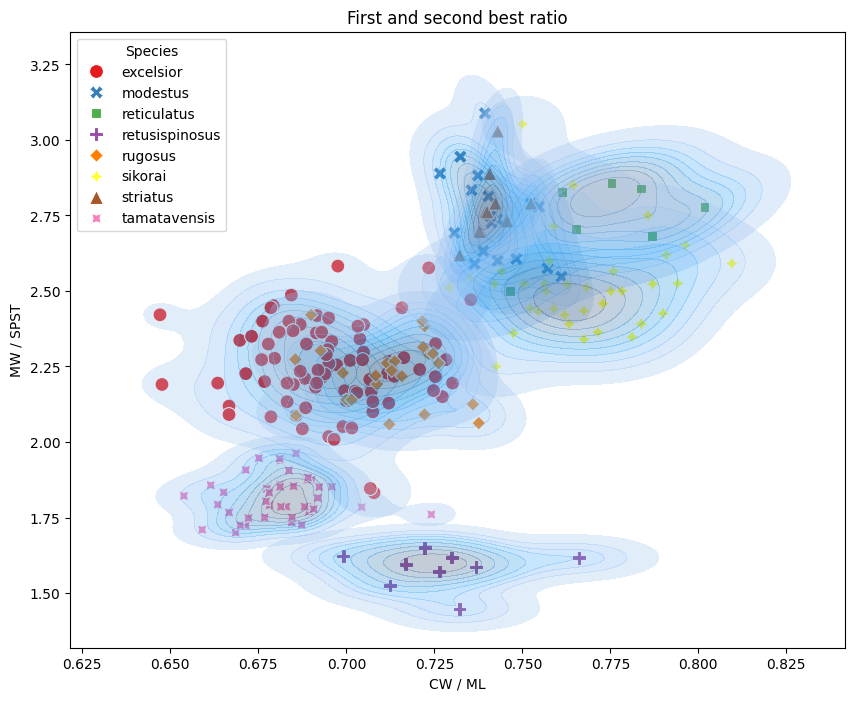

In [20]:
# CW / ML ve MW / SPST oranlarını kullanarak yeni sütunlar oluşturma
df['CW_ML_ratio'] = df['CW'] / df['ML']
df['MW_SPST_ratio'] = df['MW'] / df['SPST']

plt.figure(figsize=(10, 8))

# Scatter plot oluşturma
sns.scatterplot(data=df, x='CW_ML_ratio', y='MW_SPST_ratio', hue='species', style='species', s=100, palette='Set1')

# Her bir tür için alanları göstermek için regplot kullanarak gölgeleme (hue'nun her bir kategorisi için alan ekler)
for species in df['species'].unique():
    species_data = df[df['species'] == species]
    sns.kdeplot(data=species_data, x='CW_ML_ratio', y='MW_SPST_ratio',
                alpha=0.3, fill=True, label=f"{species}",
                hue=species_data['species'])

plt.xlabel("CW / ML")
plt.ylabel("MW / SPST")
plt.title("First and second best ratio")
plt.legend(title='Species')
plt.show()


In [21]:
# 2. Hedef Sütunu ve Özellikleri Ayarla
X = df.drop(columns=["species", "dendroname"], axis=1)  # Özellikler
y = df["species"]  # Hedef

# Sayısal olmayan sütunları kontrol et ve dönüştür
for column in X.columns:
    if X[column].dtype == "object":
        le = LabelEncoder()
        X[column] = le.fit_transform(X[column])

# Hedef sütunu label encode
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 3. Veriyi Eğitim ve Test Seti Olarak Ayır
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# 4. Karar Ağacı Modelini Oluştur ve Eğit
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# LabelEncoder ile dönüşüm yapılan sınıfları yazdır
class_mapping = dict(enumerate(label_encoder.classes_))
print("\nClass Mapping:", class_mapping)


# 5. Test Seti ile Modeli Değerlendir
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# # 6. Tahmin Yap
# new_data = np.array([[800, 370, 700, 650]])  # Yeni veri
# new_data_df = pd.DataFrame(new_data, columns=X.columns)  # Sütunları eşleştir
# prediction = model.predict(new_data_df)
# print("Tahmin Edilen Tür:", label_encoder.inverse_transform(prediction))



Class Mapping: {0: 'excelsior', 1: 'modestus', 2: 'reticulatus', 3: 'retusispinosus', 4: 'rugosus', 5: 'sikorai', 6: 'striatus', 7: 'tamatavensis'}
Accuracy: 0.9130434782608695

Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       0.71      1.00      0.83         5
           2       1.00      1.00      1.00         2
           3       1.00      0.33      0.50         3
           4       0.83      0.71      0.77         7
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         4

    accuracy                           0.91        46
   macro avg       0.94      0.88      0.88        46
weighted avg       0.92      0.91      0.90        46



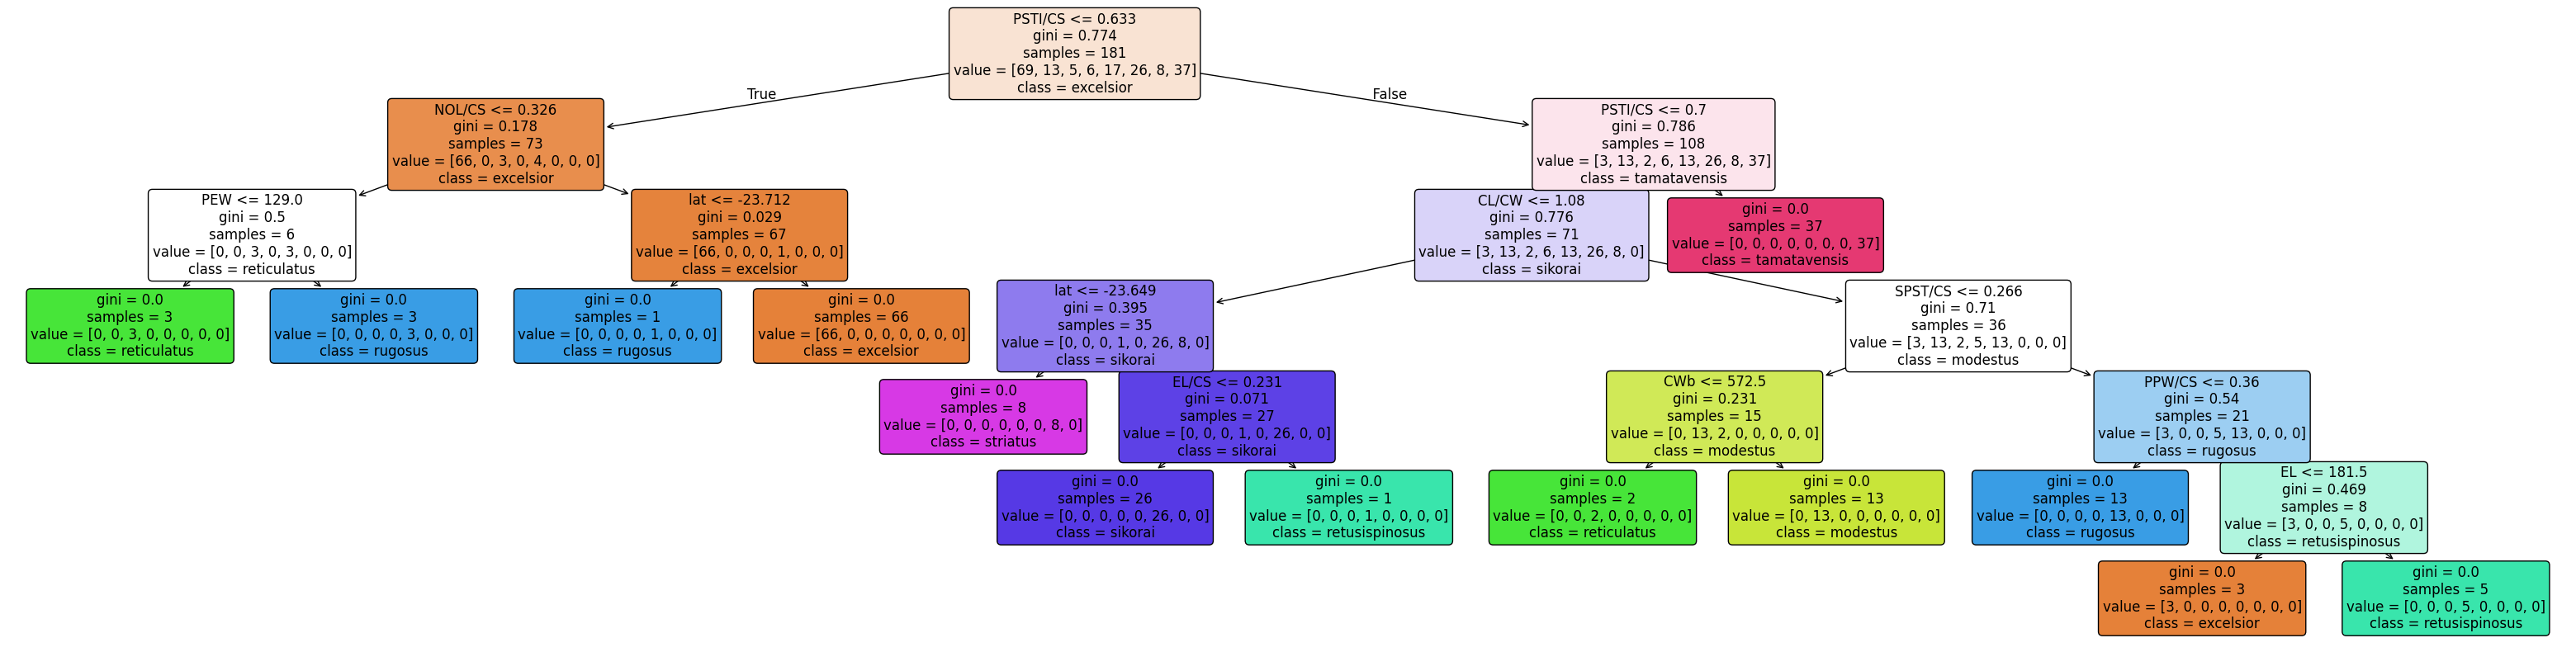

In [22]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# 1. Karar Ağacını Görselleştir
plt.figure(figsize=(40,10))  # Boyutları artırarak daha net görüntülenmesini sağlayabilirsiniz
plot_tree(model,
          filled=True,               # Düğümleri renkli yapar
          feature_names=X.columns,  # Özellik isimlerini verir
          class_names=label_encoder.classes_,  # Sınıf isimlerini verir
          rounded=True,              # Düğüm köşelerini yuvarlak yapar
          fontsize=12)               # Yazı boyutunu ayarlar

# 2. Görselleştirmeyi göster
plt.show()
